In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iqtools import *
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
def fit_function(x, *p):
    """
    Gaussian
    """
    return p[0] + p[1] * np.exp(-(x - p[2]) ** 2 / (2. * p[3] ** 2))

In [3]:
filename = 'RSA51_238U90+190MeVu-2014.10.23.14.58.52.007.TIQ'
filename_base = os.path.basename(filename)
filename_wo_ext = os.path.splitext(filename)[0]

In [6]:
d = TIQData(filename)

In [21]:
d.read_samples(100*1024, 1000)

In [22]:
f, p, _ = d.get_fft()

In [23]:
mean, sigma, mhm, phm = d.get_sigma_estimate(f,p)

In [24]:
# set initial params
offset = mean
amp = p[mean]
params = [offset, amp, mean, sigma]

# define dummy axis
x = np.arange(len(p))
# define cut
data_cut = (x > mean - 4 * sigma) & (x < mean + 4 * sigma)

In [25]:
# Do Fit
popt, pcov = curve_fit(fit_function, x[data_cut], p[data_cut], p0=params)

# Get the area
area = sum(fit_function(x, *popt))

RSA51_238U90+190MeVu-2014.10.23.14.58.52.007.TIQ -1.97224699779e-13 1.12173822377e-10 51837.705345 3040.3705805 8.34689737377e-07


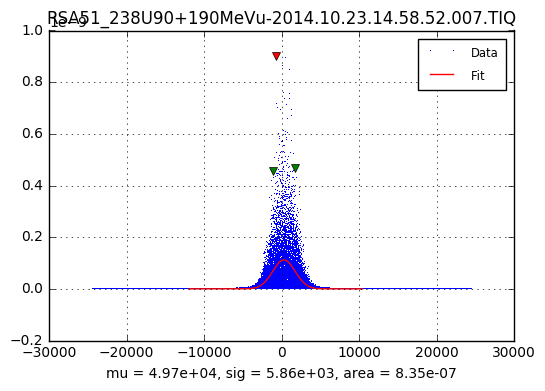

In [26]:
# plot with original data
fig = plt.figure()
ax = fig.gca()
ax.plot(f, p, 'b,', label='Data')
ax.plot(f[data_cut], fit_function(x[data_cut], *popt), 'r', label='Fit')
ax.set_xlabel('mu = {:0.2e}, sig = {:0.2e}, area = {:0.2e}'.format(mean, sigma, area))
ax.set_title(filename_base)
plt.plot(f[mean], p[mean], 'rv')
plt.plot(f[mhm], p[mhm],'gv')
plt.plot(f[phm], p[phm],'gv')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=False)
# Set legend fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

plt.grid()
plt.savefig('{}.png'.format(filename_wo_ext))
print(filename_base, ' '.join(map(str, popt)), area)